In [50]:
# Import python libraries}

import pandas as pd 
from pathlib import Path
from pandas.plotting import scatter_matrix
%matplotlib inline
import hvplot.pandas
import numpy as np

In [2]:
def marketcap(df):
     # Fucc
    shares_outstanding = list(df.index.get_level_values('Shares Outstanding'))
    prices = list(df['Close'])
    market_cap = []
    for idx, price in enumerate(prices):
        market_cap.append(prices[idx] * shares_outstanding[idx])
    df['Market Cap'] = pd.Series({'Market Cap' : market_cap}) 
    return df



In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
# A purpose specific Function to clean the dataframe  

def clean_data(df):
    """Returns df with Columns ['SimFinId', 'Currency'] drop with .drop funtion
      
       .dropped function grouped by ['Ticker','Fiscal Year']  as type int """
    
    df.drop(['SimFinId', 'Currency'], inplace= True, errors='ignore', axis=1)
    df = df.groupby(['Ticker','Fiscal Year']).mean().dropna().astype(int)
    return df


In [5]:
# need help getting market cap and other funtions working 

In [6]:
#  A purpose specific Function to calculate the return on capital 


def return_on_cap(df):
    """Returns a Pandas DataFrame with a column holding the % change value of our ROC
    DataFrame['Column Name'] - DataFrame['Column Name']
    """
    
    df['ROC'] = df['Total Current Assets'] - df['Total Current Liabilities']
    return pd.DataFrame(data=df['ROC']).pct_change().dropna()


In [7]:
def merge_df(df1_one, df_two):
    """ Returns df1_one merged with df_two 
         on=['Ticker','Fiscal Year']
    """
    
    df_ret = pd.DataFrame()
    df_ret  = df1_one.merge(df_two, on=['Ticker','Fiscal Year'])
    return df_ret


In [8]:
# A purpose specific Function to calculate the return on capital


def make_book_price(df):
    """Returns a Pandas DataFrame with a column holding the % change value of our price to book
    DataFrame['Column Name'] - DataFrame['Column Name']
    """
    
    df['P_B'] = df['Market Cap'] / df_['Total Equity']
    return  pd.DataFrame(data=df['P/B']).pct_change().dropna()



In [9]:
"""Import the data by reading in the CSV file and setting the DatetimeIndex 


Be sure to set the DatetimeIndex using the parse_dates and infer_datetime_format parameters"""


us_balance_annual = pd.read_csv(
    Path('us-balance-annual.csv'),
    parse_dates=True,
    infer_datetime_format=True,
    delimiter=';')


In [10]:
# The first use of our clean_data function 

balance_data = clean_data(us_balance_annual)
balance_data


Shares (Basic)  Shares (Diluted)  \
Ticker Fiscal Year                                     
A      2009              346000000         346000000   
       2010              347000000         353000000   
       2011              347000000         355000000   
       2012              348000000         353000000   
       2016              326000000         329000000   
...                            ...               ...   
XRX    2012              325513250         332296000   
       2013              306371500         318381750   
       2014              288591250         292899250   
       2018              248707000         251660000   
ZAGG   2012               30339000          31656000   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
A      2009                                             -2147483648   
       2010                                             -2147483648   
       2011                                             -2147483648   
       2012                                             -2147483648   
       2016                                             -2147483648   
...                                                             ...   
XRX    2012                                              1246000000   
       2013                                              1764000000   
       2014                                              1411000000   
       2018                                              1084000000   
ZAGG   2012                                                20177000   

                    Accounts & Notes Receivable  Inventories  \
Ticker Fiscal Year                                             
A      2009                           595000000    552000000   
       2010                           869000000    716000000   
       2011                           860000000    898000000   
       2012                           923000000   1014000000   
       2016                           631000000    533000000   
...                                         ...          ...   
XRX    2012                         -2147483648   1011000000   
       2013                         -2147483648    998000000   
       2014                         -2147483648    934000000   
       2018                          1276000000    818000000   
ZAGG   2012                            54561000     39988000   

                    Total Current Assets  Property, Plant & Equipment, Net  \
Ticker Fiscal Year                                                           
A      2009                  -2147483648                         845000000   
       2010                  -2147483648                         980000000   
       2011                  -2147483648                        1006000000   
       2012                  -2147483648                        1164000000   
       2016                  -2147483648                         639000000   
...                                  ...                               ...   
XRX    2012                  -2147483648                        2091000000   
       2013                  -2147483648                        2025000000   
       2014                  -2147483648                        1648000000   
       2018                  -2147483648                         941000000   
ZAGG   2012                    131185000                           4862000   

                    Long Term Investments & Receivables  \
Ticker Fiscal Year                                        
A      2009                                   163000000   
       2010                                   142000000   
       2011                                   117000000   
       2012                                   109000000   
       2016                                   135000000   
...                                                 ...   
XRX    2012                                  13

In [11]:
"""Use 'index.get.level_values' to extract time frame desired for comparisons.
        

    Parameters
levelint or str
It is either the integer position or the name of the level.

Returns
Index
Calling object, as there is only one level in the Index.

"""

mask = (balance_data.index.get_level_values('Fiscal Year') >= 2014) & (balance_data.index.get_level_values('Fiscal Year')<=2019)
df_balance_data = balance_data.loc[mask]
df_balance_data



Shares (Basic)  Shares (Diluted)  \
Ticker Fiscal Year                                     
A      2016              326000000         329000000   
ABBV   2014             1595000000        1610000000   
       2015             1625000000        1637000000   
       2016             1622000000        1631000000   
       2017             1596000000        1603000000   
...                            ...               ...   
XOM    2017            -2147483648       -2147483648   
       2018            -2147483648       -2147483648   
       2019            -2147483648       -2147483648   
XRX    2014              288591250         292899250   
       2018              248707000         251660000   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
A      2016                                             -2147483648   
ABBV   2014                                             -2147483648   
       2015                                             -2147483648   
       2016                                             -2147483648   
       2017                                             -2147483648   
...                                                             ...   
XOM    2017                                             -2147483648   
       2018                                             -2147483648   
       2019                                             -2147483648   
XRX    2014                                              1411000000   
       2018                                              1084000000   

                    Accounts & Notes Receivable  Inventories  \
Ticker Fiscal Year                                             
A      2016                           631000000    533000000   
ABBV   2014                         -2147483648   1124000000   
       2015                         -2147483648   1719000000   
       2016                         -2147483648   1444000000   
       2017                         -2147483648   1605000000   
...                                         ...          ...   
XOM    2017                         -2147483648  -2147483648   
       2018                         -2147483648  -2147483648   
       2019                         -2147483648  -2147483648   
XRX    2014                         -2147483648    934000000   
       2018                          1276000000    818000000   

                    Total Current Assets  Property, Plant & Equipment, Net  \
Ticker Fiscal Year                                                           
A      2016                  -2147483648                         639000000   
ABBV   2014                  -2147483648                       -2147483648   
       2015                  -2147483648                       -2147483648   
       2016                  -2147483648                       -2147483648   
       2017                  -2147483648                       -2147483648   
...                                  ...                               ...   
XOM    2017                  -2147483648                       -2147483648   
       2018                  -2147483648                       -2147483648   
       2019                  -2147483648                       -2147483648   
XRX    2014                  -2147483648                        1648000000   
       2018                  -2147483648                         941000000   

                    Long Term Investments & Receivables  \
Ticker Fiscal Year                                        
A      2016                                   135000000   
ABBV   2014                                    92000000   
       2015                                   145000000   
       2016                                  1783000000   
       2017                                  2090000000   
...                                                 ...   
XOM    2017                                 -21

In [12]:
# Selecting columns from one Pandas DataFrame and storing in new variables determined by values present 



balance_sheet_cash_equal = df_balance_data[["Total Current Assets" ,"Cash, Cash Equivalents & Short Term Investments", 
                                  "Accounts & Notes Receivable", 
                                  'Treasury Stock', 
                                  'Retained Earnings']]
balance_sheet_cash_equal


Total Current Assets  \
Ticker Fiscal Year                         
A      2016                  -2147483648   
ABBV   2014                  -2147483648   
       2015                  -2147483648   
       2016                  -2147483648   
       2017                  -2147483648   
...                                  ...   
XOM    2017                  -2147483648   
       2018                  -2147483648   
       2019                  -2147483648   
XRX    2014                  -2147483648   
       2018                  -2147483648   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
A      2016                                             -2147483648   
ABBV   2014                                             -2147483648   
       2015                                             -2147483648   
       2016                                             -2147483648   
       2017                                             -2147483648   
...                                                             ...   
XOM    2017                                             -2147483648   
       2018                                             -2147483648   
       2019                                             -2147483648   
XRX    2014                                              1411000000   
       2018                                              1084000000   

                    Accounts & Notes Receivable  Treasury Stock  \
Ticker Fiscal Year                                                
A      2016                           631000000     -2147483648   
ABBV   2014                         -2147483648      -972000000   
       2015                         -2147483648     -2147483648   
       2016                         -2147483648     -2147483648   
       2017                         -2147483648     -2147483648   
...                                         ...             ...   
XOM    2017                         -2147483648     -2147483648   
       2018                         -2147483648     -2147483648   
       2019                         -2147483648     -2147483648   
XRX    2014                         -2147483648      -105000000   
       2018                          1276000000       -55000000   

                    Retained Earnings  
Ticker Fiscal Year                     
A      2016               -2147483648  
ABBV   2014                 535000000  
       2015               -2147483648  
       2016               -2147483648  
       2017               -2147483648  
...                               ...  
XOM    2017               -2147483648  
       2018               -2147483648  
       2019               -2147483648  
XRX    2014               -2147483648  
       2018               -2147483648  

[657 rows x 5 columns]

In [13]:
# Selecting columns from one Pandas DataFrame and storing in new variable 


balance_sheet_tanglibles = df_balance_data[
    ['Total Current Assets',
     "Cash, Cash Equivalents & Short Term Investments",
      "Property, Plant & Equipment, Net",
      "Retained Earnings", 
      "Total Equity"]]

balance_sheet_tanglibles


Total Current Assets  \
Ticker Fiscal Year                         
A      2016                  -2147483648   
ABBV   2014                  -2147483648   
       2015                  -2147483648   
       2016                  -2147483648   
       2017                  -2147483648   
...                                  ...   
XOM    2017                  -2147483648   
       2018                  -2147483648   
       2019                  -2147483648   
XRX    2014                  -2147483648   
       2018                  -2147483648   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
A      2016                                             -2147483648   
ABBV   2014                                             -2147483648   
       2015                                             -2147483648   
       2016                                             -2147483648   
       2017                                             -2147483648   
...                                                             ...   
XOM    2017                                             -2147483648   
       2018                                             -2147483648   
       2019                                             -2147483648   
XRX    2014                                              1411000000   
       2018                                              1084000000   

                    Property, Plant & Equipment, Net  Retained Earnings  \
Ticker Fiscal Year                                                        
A      2016                                639000000        -2147483648   
ABBV   2014                              -2147483648          535000000   
       2015                              -2147483648        -2147483648   
       2016                              -2147483648        -2147483648   
       2017                              -2147483648        -2147483648   
...                                              ...                ...   
XOM    2017                              -2147483648        -2147483648   
       2018                              -2147483648        -2147483648   
       2019                              -2147483648        -2147483648   
XRX    2014                               1648000000        -2147483648   
       2018                                941000000        -2147483648   

                    Total Equity  
Ticker Fiscal Year                
A      2016          -2147483648  
ABBV   2014           1742000000  
       2015          -2147483648  
       2016          -2147483648  
       2017          -2147483648  
...                          ...  
XOM    2017          -2147483648  
       2018          -2147483648  
       2019          -2147483648  
XRX    2014          -2147483648  
       2018          -2147483648  

[657 rows x 5 columns]

In [14]:
# Selecting columns from Pandas DataFrame and storing in new variables determined by values present 

balance_sheet_intanglibles = df_balance_data[
    ['Treasury Stock', 
     'Long Term Investments & Receivables', 
     'Shares (Basic)', 
     'Shares (Diluted)']]

balance_sheet_intanglibles


Treasury Stock  Long Term Investments & Receivables  \
Ticker Fiscal Year                                                        
A      2016            -2147483648                            135000000   
ABBV   2014             -972000000                             92000000   
       2015            -2147483648                            145000000   
       2016            -2147483648                           1783000000   
       2017            -2147483648                           2090000000   
...                            ...                                  ...   
XOM    2017            -2147483648                          -2147483648   
       2018            -2147483648                          -2147483648   
       2019            -2147483648                          -2147483648   
XRX    2014             -105000000                           1338000000   
       2018              -55000000                           1403000000   

                    Shares (Basic)  Shares (Diluted)  
Ticker Fiscal Year                                    
A      2016              326000000         329000000  
ABBV   2014             1595000000        1610000000  
       2015             1625000000        1637000000  
       2016             1622000000        1631000000  
       2017             1596000000        1603000000  
...                            ...               ...  
XOM    2017            -2147483648       -2147483648  
       2018            -2147483648       -2147483648  
       2019            -2147483648       -2147483648  
XRX    2014              288591250         292899250  
       2018              248707000         251660000  

[657 rows x 4 columns]

In [15]:
# Selecting columns from one Pandas DataFrame and storing in new variables determined by values present 

balance_data_neg = df_balance_data[
    ["Inventories",
     "Share Capital & Additional Paid-In Capital", 
     "Payables & Accruals", "Total Noncurrent Liabilities", 
     "Long Term Debt", 
     'Total Liabilities & Equity', 
     'Total Current Liabilities']]

balance_data_neg


Inventories  Share Capital & Additional Paid-In Capital  \
Ticker Fiscal Year                                                            
A      2016           533000000                                 -2147483648   
ABBV   2014          1124000000                                 -2147483648   
       2015          1719000000                                 -2147483648   
       2016          1444000000                                 -2147483648   
       2017          1605000000                                 -2147483648   
...                         ...                                         ...   
XOM    2017         -2147483648                                 -2147483648   
       2018         -2147483648                                 -2147483648   
       2019         -2147483648                                 -2147483648   
XRX    2014           934000000                                 -2147483648   
       2018           818000000                                 -2147483648   

                    Payables & Accruals  Total Noncurrent Liabilities  \
Ticker Fiscal Year                                                      
A      2016                   257000000                   -2147483648   
ABBV   2014                 -2147483648                   -2147483648   
       2015                 -2147483648                   -2147483648   
       2016                 -2147483648                   -2147483648   
       2017                 -2147483648                   -2147483648   
...                                 ...                           ...   
XOM    2017                 -2147483648                   -2147483648   
       2018                 -2147483648                   -2147483648   
       2019                 -2147483648                   -2147483648   
XRX    2014                 -2147483648                   -2147483648   
       2018                  1440000000                   -2147483648   

                    Long Term Debt  Total Liabilities & Equity  \
Ticker Fiscal Year                                               
A      2016             1904000000                  -795934592   
ABBV   2014            -2147483648                  1743196224   
       2015            -2147483648                  1510392448   
       2016            -2147483648                  1674490560   
       2017            -2147483648                  2066523264   
...                            ...                         ...   
XOM    2017            -2147483648                   798649024   
       2018            -2147483648                 -1696350976   
       2019            -2147483648                  1819747136   
XRX    2014            -2147483648                  1888196224   
       2018            -2147483648                  1989098112   

                    Total Current Liabilities  
Ticker Fiscal Year                             
A      2016                         945000000  
ABBV   2014                       -2147483648  
       2015                       -2147483648  
       2016                       -2147483648  
       2017                       -2147483648  
...                                       ...  
XOM    2017                       -2147483648  
       2018                       -2147483648  
       2019                       -2147483648  
XRX    2014                       -2147483648  
       2018                       -2147483648  

[657 rows x 7 columns]

In [16]:
"""Import the data by reading in the CSV file and setting the DatetimeIndex 


Be sure to set the DatetimeIndex using the parse_dates and infer_datetime_format parameters"""


us_shareprice_df = pd.read_csv(
    Path('us-shareprices-daily.csv'),
    parse_dates=True,
    infer_datetime_format=True,
    delimiter=';'
)

us_shareprice_df.head()


,Ticker,SimFinId,Date,Open,Low,High,Close,Adj. Close,Dividend,Volume,Shares Outstanding
0,GOOG,18,2014-03-27,568.000,552.920,568.000,558.460,558.460,nan,13100,336050831.000
1,GOOG,18,2014-03-28,561.200,558.670,566.430,559.990,559.990,nan,41100,336050831.000
2,GOOG,18,2014-03-31,566.890,556.930,567.000,556.970,556.970,nan,10800,674462000.000
3,GOOG,18,2014-04-01,558.710,558.710,568.450,567.160,567.160,nan,7900,674462000.000
4,GOOG,18,2014-04-02,565.110,562.190,604.830,567.000,567.000,nan,146700,674462000.000


In [17]:
"""
Using group by to place 


"""

share_price_data = us_shareprice_df.groupby(['Ticker','Date','Shares Outstanding']).mean().dropna().astype(int)
share_price_data

SimFinId  Open  Low  High  Close  \
Ticker Date       Shares Outstanding                                     
A      2012-03-30 593000000.000          45846    44   44    44     44   
       2012-06-29 594000000.000          45846    38   38    39     39   
       2012-09-28 595000000.000          45846    38   37    38     38   
       2012-12-27 347934544.000          45846    40   40    40     40   
       2013-03-28 598000000.000          45846    42   41    42     41   
...                                        ...   ...  ...   ...    ...   
ZTS    2019-01-17 479562326.000         378251    82   82    84     84   
       2019-04-17 479026001.000         378251    99   96    99     97   
       2019-07-18 477821280.000         378251   114  114   115    114   
       2019-10-21 476745789.000         378251   128  125   128    126   
       2020-01-16 475528210.000         378251   138  138   139    139   

                                      Adj. Close  Dividend   Volume  
Ticker Date       Shares Outstanding                                 
A      2012-03-30 593000000.000               29         0  2322400  
       2012-06-29 594000000.000               26         0  2645800  
       2012-09-28 595000000.000               25         0  4866500  
       2012-12-27 347934544.000               27         0  2019800  
       2013-03-28 598000000.000               28         0  2148000  
...                                          ...       ...      ...  
ZTS    2019-01-17 479562326.000               83         0  2711408  
       2019-04-17 479026001.000               97         0  2142549  
       2019-07-18 477821280.000              113         0  1177706  
       2019-10-21 476745789.000              125         0  1674005  
       2020-01-16 475528210.000              138         0  1822755  

[37135 rows x 8 columns]

In [18]:
"""Use 'index.get.level_values' to extract time frame desired for comparisons.
        

    Parameters
levelint or str
It is either the integer position or the name of the level.

Returns
Index
Calling object, as there is only one level in the Index.

"""

mask = (balance_data.index.get_level_values('Fiscal Year') >= 2014) & (balance_data.index.get_level_values('Fiscal Year')<=2019)
df_balance_data = balance_data.loc[mask]
df_balance_data

Shares (Basic)  Shares (Diluted)  \
Ticker Fiscal Year                                     
A      2016              326000000         329000000   
ABBV   2014             1595000000        1610000000   
       2015             1625000000        1637000000   
       2016             1622000000        1631000000   
       2017             1596000000        1603000000   
...                            ...               ...   
XOM    2017            -2147483648       -2147483648   
       2018            -2147483648       -2147483648   
       2019            -2147483648       -2147483648   
XRX    2014              288591250         292899250   
       2018              248707000         251660000   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
A      2016                                             -2147483648   
ABBV   2014                                             -2147483648   
       2015                                             -2147483648   
       2016                                             -2147483648   
       2017                                             -2147483648   
...                                                             ...   
XOM    2017                                             -2147483648   
       2018                                             -2147483648   
       2019                                             -2147483648   
XRX    2014                                              1411000000   
       2018                                              1084000000   

                    Accounts & Notes Receivable  Inventories  \
Ticker Fiscal Year                                             
A      2016                           631000000    533000000   
ABBV   2014                         -2147483648   1124000000   
       2015                         -2147483648   1719000000   
       2016                         -2147483648   1444000000   
       2017                         -2147483648   1605000000   
...                                         ...          ...   
XOM    2017                         -2147483648  -2147483648   
       2018                         -2147483648  -2147483648   
       2019                         -2147483648  -2147483648   
XRX    2014                         -2147483648    934000000   
       2018                          1276000000    818000000   

                    Total Current Assets  Property, Plant & Equipment, Net  \
Ticker Fiscal Year                                                           
A      2016                  -2147483648                         639000000   
ABBV   2014                  -2147483648                       -2147483648   
       2015                  -2147483648                       -2147483648   
       2016                  -2147483648                       -2147483648   
       2017                  -2147483648                       -2147483648   
...                                  ...                               ...   
XOM    2017                  -2147483648                       -2147483648   
       2018                  -2147483648                       -2147483648   
       2019                  -2147483648                       -2147483648   
XRX    2014                  -2147483648                        1648000000   
       2018                  -2147483648                         941000000   

                    Long Term Investments & Receivables  \
Ticker Fiscal Year                                        
A      2016                                   135000000   
ABBV   2014                                    92000000   
       2015                                   145000000   
       2016                                  1783000000   
       2017                                  2090000000   
...                                                 ...   
XOM    2017                                 -21

In [19]:
share_price_data = pd.DataFrame(share_price_data[['Close', 'Volume']]).astype(int)
share_price_data

Close   Volume
Ticker Date       Shares Outstanding                
A      2012-03-30 593000000.000          44  2322400
       2012-06-29 594000000.000          39  2645800
       2012-09-28 595000000.000          38  4866500
       2012-12-27 347934544.000          40  2019800
       2013-03-28 598000000.000          41  2148000
...                                     ...      ...
ZTS    2019-01-17 479562326.000          84  2711408
       2019-04-17 479026001.000          97  2142549
       2019-07-18 477821280.000         114  1177706
       2019-10-21 476745789.000         126  1674005
       2020-01-16 475528210.000         139  1822755

[37135 rows x 2 columns]

In [20]:
# Using the Pandas .loc function to select a pair of companies

big_tech = share_price_data.loc[['AME','INTC']]
big_tech

Close    Volume
Ticker Date       Shares Outstanding                 
AME    2009-09-14 241916155.000          15    782578
       2009-12-02 242636974.000          16    404800
       2010-03-15 242798456.000          17    264000
       2010-06-14 239293069.000          18    574178
       2010-09-14 239639600.000          20    687067
...                                     ...       ...
INTC   2019-02-06 4497000000.000         49  21647843
       2019-05-06 4477000000.000         51  26245240
       2019-08-06 4430000000.000         46  26119563
       2019-11-06 4350000000.000         57  17720996
       2020-02-06 4277000000.000         67  17408038

[95 rows x 2 columns]

In [21]:
"""Pandas pct_change function together with dropna to create the daily returns DataFrame. 
    Base this DataFrame on the test_tickers & big_tech[['Close','Volume']]. 
"""

big_tech_ = pd.DataFrame(big_tech[['Close','Volume']]).pct_change().dropna()
big_tech_

Close  Volume
Ticker Date       Shares Outstanding               
AME    2009-12-02 242636974.000       0.067  -0.483
       2010-03-15 242798456.000       0.062  -0.348
       2010-06-14 239293069.000       0.059   1.175
       2010-09-14 239639600.000       0.111   0.197
       2010-12-08 240074676.000       0.300  -0.250
...                                     ...     ...
INTC   2019-02-06 4497000000.000      0.043  -0.092
       2019-05-06 4477000000.000      0.041   0.212
       2019-08-06 4430000000.000     -0.098  -0.005
       2019-11-06 4350000000.000      0.239  -0.322
       2020-02-06 4277000000.000      0.175  -0.018

[94 rows x 2 columns]

In [22]:
#Pandas `cumprod` function to calculate the cumulative returns for the big_tech_tickers

big_tech_cumusum_returns = (1 + big_tech_).cumprod() 

big_tech_cumusum_returns.hvplot.box()

:BoxWhisker   [Variable]   (value)

In [23]:
# Using the Pandas .loc function to select a pair of companies

test_tickers = share_price_data.loc[['X','OXM']]
test_tickers


Close   Volume
Ticker Date       Shares Outstanding                
X      2007-02-12 118500000.000          85  5403200
       2007-05-14 118500000.000         110  2146000
       2007-08-13 118500000.000          87  3785000
       2007-11-09 118500000.000          94  4290000
       2008-02-11 118000000.000         100  3116800
...                                     ...      ...
OXM    2019-01-17 16954191.000           75   179245
       2019-04-17 16958942.000           80   190090
       2019-07-18 17019117.000           69   155876
       2019-10-17 17034929.000           69   109786
       2020-01-16 17040004.000           74    94809

[86 rows x 2 columns]

In [24]:
# Pandas `cumprod` function to calculate the cumulative returns for the test_tickers 

test_tickers_cumusum_returns = (1 + test_tickers).cumprod() 
test_tickers_cumusum_returns.hvplot.bar()

:Bars   [Ticker,Variable]   (value)

In [25]:
test_tickers_cumusum_returns.cumsum()

Close      Volume
Ticker Date       Shares Outstanding                        
X      2007-02-12 118500000.000               86     5403201
       2007-05-14 118500000.000             9632 -1131546798
       2007-08-13 118500000.000           849680  1647384587
       2007-11-09 118500000.000         80654240  2035047444
       2008-02-11 118000000.000       -449019792  1225762589
...                                          ...         ...
OXM    2019-01-17 16954191.000       -1248400400   429532293
       2019-04-17 16958942.000       -1248400400   429532293
       2019-07-18 17019117.000       -1248400400   429532293
       2019-10-17 17034929.000       -1248400400   429532293
       2020-01-16 17040004.000       -1248400400   429532293

[86 rows x 2 columns]

In [26]:
# The first use of the 'merge_df' funtion

balance_cash_vs_neg_cash = merge_df(balance_sheet_cash_equal, balance_data_neg)
balance_cash_vs_neg_cash


Total Current Assets  \
Ticker Fiscal Year                         
A      2016                  -2147483648   
ABBV   2014                  -2147483648   
       2015                  -2147483648   
       2016                  -2147483648   
       2017                  -2147483648   
...                                  ...   
XOM    2017                  -2147483648   
       2018                  -2147483648   
       2019                  -2147483648   
XRX    2014                  -2147483648   
       2018                  -2147483648   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
A      2016                                             -2147483648   
ABBV   2014                                             -2147483648   
       2015                                             -2147483648   
       2016                                             -2147483648   
       2017                                             -2147483648   
...                                                             ...   
XOM    2017                                             -2147483648   
       2018                                             -2147483648   
       2019                                             -2147483648   
XRX    2014                                              1411000000   
       2018                                              1084000000   

                    Accounts & Notes Receivable  Treasury Stock  \
Ticker Fiscal Year                                                
A      2016                           631000000     -2147483648   
ABBV   2014                         -2147483648      -972000000   
       2015                         -2147483648     -2147483648   
       2016                         -2147483648     -2147483648   
       2017                         -2147483648     -2147483648   
...                                         ...             ...   
XOM    2017                         -2147483648     -2147483648   
       2018                         -2147483648     -2147483648   
       2019                         -2147483648     -2147483648   
XRX    2014                         -2147483648      -105000000   
       2018                          1276000000       -55000000   

                    Retained Earnings  Inventories  \
Ticker Fiscal Year                                   
A      2016               -2147483648    533000000   
ABBV   2014                 535000000   1124000000   
       2015               -2147483648   1719000000   
       2016               -2147483648   1444000000   
       2017               -2147483648   1605000000   
...                               ...          ...   
XOM    2017               -2147483648  -2147483648   
       2018               -2147483648  -2147483648   
       2019               -2147483648  -2147483648   
XRX    2014               -2147483648    934000000   
       2018               -2147483648    818000000   

                    Share Capital & Additional Paid-In Capital  \
Ticker Fiscal Year                                               
A      2016                                        -2147483648   
ABBV   2014                                        -2147483648   
       2015                                        -2147483648   
       2016                                        -2147483648   
       2017                                        -2147483648   
...                                                        ...   
XOM    2017                                        -2147483648   
       2018                                        -2147483648   
       2019                                        -2147483648   
XRX    2014                                        -2147483648   
       2018                                        -2147483648   

                    Payables & Accruals  Total Noncurrent Liabilities  \
Ticker Fiscal Ye

In [27]:

balance_cash_vs_neg_cash_dog = balance_cash_vs_neg_cash.loc[['X','XOM']]
balance_cash_vs_neg_cash_dog


Total Current Assets  \
Ticker Fiscal Year                         
X      2014                  -2147483648   
       2015                  -2147483648   
       2016                  -2147483648   
       2017                  -2147483648   
       2018                  -2147483648   
       2019                  -2147483648   
XOM    2014                  -2147483648   
       2015                  -2147483648   
       2016                  -2147483648   
       2017                  -2147483648   
       2018                  -2147483648   
       2019                  -2147483648   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
X      2014                                              1354000000   
       2015                                               755000000   
       2016                                              1515000000   
       2017                                              1553000000   
       2018                                              1000000000   
       2019                                               749000000   
XOM    2014                                             -2147483648   
       2015                                             -2147483648   
       2016                                             -2147483648   
       2017                                             -2147483648   
       2018                                             -2147483648   
       2019                                             -2147483648   

                    Accounts & Notes Receivable  Treasury Stock  \
Ticker Fiscal Year                                                
X      2014                          1632000000      -396000000   
       2015                           864000000      -339000000   
       2016                           976000000      -182000000   
       2017                          1173000000       -76000000   
       2018                          1435000000       -78000000   
       2019                           956000000      -173000000   
XOM    2014                         -2147483648     -2147483648   
       2015                         -2147483648     -2147483648   
       2016                         -2147483648     -2147483648   
       2017                         -2147483648     -2147483648   
       2018                         -2147483648     -2147483648   
       2019                         -2147483648     -2147483648   

                    Retained Earnings  Inventories  \
Ticker Fiscal Year                                   
X      2014                1862000000  -2147483648   
       2015                 190000000   2074000000   
       2016                -250000000   1573000000   
       2017                 133000000   1738000000   
       2018                1212000000   2092000000   
       2019                 544000000   1785000000   
XOM    2014               -2147483648  -2147483648   
       2015               -2147483648  -2147483648   
       2016               -2147483648  -2147483648   
       2017               -2147483648  -2147483648   
       2018               -2147483648  -2147483648   
       2019               -2147483648  -2147483648   

                    Share Capital & Additional Paid-In Capital  \
Ticker Fiscal Year                                               
X      2014                                        -2147483648   
       2015                                        -2147483648   
       2016                                        -2147483648   
       2017                                        -2147483648   
       2018                                        -2147483648   
       2019                                        -2147483648   
XOM    2014                                        -2147483648   
       2015                                        -2147483648   
       2016                                        -

In [28]:

balance_cash_vs_neg_cash_tech = balance_cash_vs_neg_cash.loc[['AME','IBM']]
balance_cash_vs_neg_cash_tech


Total Current Assets  \
Ticker Fiscal Year                         
AME    2014                   1578604000   
       2015                   1618827000   
       2016                   1928190000   
       2017                   1934655000   
       2018                   1836144000   
       2019                   2025771000   
IBM    2014                  -2147483648   
       2015                  -2147483648   
       2016                  -2147483648   
       2017                  -2147483648   
       2018                  -2147483648   
       2019                  -2147483648   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
AME    2014                                               377615000   
       2015                                               381005000   
       2016                                               717259000   
       2017                                               646300000   
       2018                                               353975000   
       2019                                               393030000   
IBM    2014                                             -2147483648   
       2015                                             -2147483648   
       2016                                             -2147483648   
       2017                                             -2147483648   
       2018                                             -2147483648   
       2019                                             -2147483648   

                    Accounts & Notes Receivable  Treasury Stock  \
Ticker Fiscal Year                                                
AME    2014                           585462000      -457807000   
       2015                           603295000      -885430000   
       2016                           592326000     -1211539000   
       2017                           668176000     -1209135000   
       2018                           732839000     -1570184000   
       2019                           744760000     -1574464000   
IBM    2014                         -2147483648     -2147483648   
       2015                         -2147483648     -2147483648   
       2016                         -2147483648     -2147483648   
       2017                         -2147483648     -2147483648   
       2018                         -2147483648     -2147483648   
       2019                         -2147483648     -2147483648   

                    Retained Earnings  Inventories  \
Ticker Fiscal Year                                   
AME    2014               -2147483648    495896000   
       2015               -2147483648    514451000   
       2016               -2147483648    492104000   
       2017               -2147483648    540504000   
       2018               -2147483648    624744000   
       2019               -2147483648    624567000   
IBM    2014               -2147483648   2103000000   
       2015               -2147483648   1551000000   
       2016               -2147483648   1553000000   
       2017               -2147483648   1583000000   
       2018               -2147483648   1682000000   
       2019               -2147483648   1619000000   

                    Share Capital & Additional Paid-In Capital  \
Ticker Fiscal Year                                               
AME    2014                                          494339000   
       2015                                          570894000   
       2016                                          606758000   
       2017                                          663525000   
       2018                                          709383000   
       2019                                          835483000   
IBM    2014                                        -2147483648   
       2015                                        -2147483648   
       2016                                        -

In [29]:
return_on_cap(balance_cash_vs_neg_cash_tech).hvplot()

:Curve   [Ticker]   (ROC)

In [30]:
balance_cash_vs_neg_cash_tech.hvplot.bar()

:Bars   [Ticker,Fiscal Year]   (Total Current Assets)

In [31]:

balance_cash_vs_neg_cash_dog = balance_cash_vs_neg_cash.loc[['X','XOM']]
balance_cash_vs_neg_cash_dog


Total Current Assets  \
Ticker Fiscal Year                         
X      2014                  -2147483648   
       2015                  -2147483648   
       2016                  -2147483648   
       2017                  -2147483648   
       2018                  -2147483648   
       2019                  -2147483648   
XOM    2014                  -2147483648   
       2015                  -2147483648   
       2016                  -2147483648   
       2017                  -2147483648   
       2018                  -2147483648   
       2019                  -2147483648   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
X      2014                                              1354000000   
       2015                                               755000000   
       2016                                              1515000000   
       2017                                              1553000000   
       2018                                              1000000000   
       2019                                               749000000   
XOM    2014                                             -2147483648   
       2015                                             -2147483648   
       2016                                             -2147483648   
       2017                                             -2147483648   
       2018                                             -2147483648   
       2019                                             -2147483648   

                    Accounts & Notes Receivable  Treasury Stock  \
Ticker Fiscal Year                                                
X      2014                          1632000000      -396000000   
       2015                           864000000      -339000000   
       2016                           976000000      -182000000   
       2017                          1173000000       -76000000   
       2018                          1435000000       -78000000   
       2019                           956000000      -173000000   
XOM    2014                         -2147483648     -2147483648   
       2015                         -2147483648     -2147483648   
       2016                         -2147483648     -2147483648   
       2017                         -2147483648     -2147483648   
       2018                         -2147483648     -2147483648   
       2019                         -2147483648     -2147483648   

                    Retained Earnings  Inventories  \
Ticker Fiscal Year                                   
X      2014                1862000000  -2147483648   
       2015                 190000000   2074000000   
       2016                -250000000   1573000000   
       2017                 133000000   1738000000   
       2018                1212000000   2092000000   
       2019                 544000000   1785000000   
XOM    2014               -2147483648  -2147483648   
       2015               -2147483648  -2147483648   
       2016               -2147483648  -2147483648   
       2017               -2147483648  -2147483648   
       2018               -2147483648  -2147483648   
       2019               -2147483648  -2147483648   

                    Share Capital & Additional Paid-In Capital  \
Ticker Fiscal Year                                               
X      2014                                        -2147483648   
       2015                                        -2147483648   
       2016                                        -2147483648   
       2017                                        -2147483648   
       2018                                        -2147483648   
       2019                                        -2147483648   
XOM    2014                                        -2147483648   
       2015                                        -2147483648   
       2016                                        -

In [32]:
balance_cash_vs_neg_cash_dog[['Retained Earnings']]

Retained Earnings
Ticker Fiscal Year                   
X      2014                1862000000
       2015                 190000000
       2016                -250000000
       2017                 133000000
       2018                1212000000
       2019                 544000000
XOM    2014               -2147483648
       2015               -2147483648
       2016               -2147483648
       2017               -2147483648
       2018               -2147483648
       2019               -2147483648

In [33]:

balance_intan_vs_tan = merge_df(balance_sheet_tanglibles,balance_sheet_intanglibles)
balance_intan_vs_tan


Total Current Assets  \
Ticker Fiscal Year                         
A      2016                  -2147483648   
ABBV   2014                  -2147483648   
       2015                  -2147483648   
       2016                  -2147483648   
       2017                  -2147483648   
...                                  ...   
XOM    2017                  -2147483648   
       2018                  -2147483648   
       2019                  -2147483648   
XRX    2014                  -2147483648   
       2018                  -2147483648   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
A      2016                                             -2147483648   
ABBV   2014                                             -2147483648   
       2015                                             -2147483648   
       2016                                             -2147483648   
       2017                                             -2147483648   
...                                                             ...   
XOM    2017                                             -2147483648   
       2018                                             -2147483648   
       2019                                             -2147483648   
XRX    2014                                              1411000000   
       2018                                              1084000000   

                    Property, Plant & Equipment, Net  Retained Earnings  \
Ticker Fiscal Year                                                        
A      2016                                639000000        -2147483648   
ABBV   2014                              -2147483648          535000000   
       2015                              -2147483648        -2147483648   
       2016                              -2147483648        -2147483648   
       2017                              -2147483648        -2147483648   
...                                              ...                ...   
XOM    2017                              -2147483648        -2147483648   
       2018                              -2147483648        -2147483648   
       2019                              -2147483648        -2147483648   
XRX    2014                               1648000000        -2147483648   
       2018                                941000000        -2147483648   

                    Total Equity  Treasury Stock  \
Ticker Fiscal Year                                 
A      2016          -2147483648     -2147483648   
ABBV   2014           1742000000      -972000000   
       2015          -2147483648     -2147483648   
       2016          -2147483648     -2147483648   
       2017          -2147483648     -2147483648   
...                          ...             ...   
XOM    2017          -2147483648     -2147483648   
       2018          -2147483648     -2147483648   
       2019          -2147483648     -2147483648   
XRX    2014          -2147483648      -105000000   
       2018          -2147483648       -55000000   

                    Long Term Investments & Receivables  Shares (Basic)  \
Ticker Fiscal Year                                                        
A      2016                                   135000000       326000000   
ABBV   2014                                    92000000      1595000000   
       2015                                   145000000      1625000000   
       2016                                  1783000000      1622000000   
       2017                                  2090000000      1596000000   
...                                                 ...             ...   
XOM    2017                                 -2147483648     -2147483648   
       2018                                 -2147483648     -2147483648   
       2019                                 -2147483648     -2147483648   
XRX    2014                                  

In [34]:
balance_intan_vs_tan_tech =  balance_intan_vs_tan.loc[['AME','IBM']]
balance_intan_vs_tan_tech

Total Current Assets  \
Ticker Fiscal Year                         
AME    2014                   1578604000   
       2015                   1618827000   
       2016                   1928190000   
       2017                   1934655000   
       2018                   1836144000   
       2019                   2025771000   
IBM    2014                  -2147483648   
       2015                  -2147483648   
       2016                  -2147483648   
       2017                  -2147483648   
       2018                  -2147483648   
       2019                  -2147483648   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
AME    2014                                               377615000   
       2015                                               381005000   
       2016                                               717259000   
       2017                                               646300000   
       2018                                               353975000   
       2019                                               393030000   
IBM    2014                                             -2147483648   
       2015                                             -2147483648   
       2016                                             -2147483648   
       2017                                             -2147483648   
       2018                                             -2147483648   
       2019                                             -2147483648   

                    Property, Plant & Equipment, Net  Retained Earnings  \
Ticker Fiscal Year                                                        
AME    2014                                448446000        -2147483648   
       2015                                484548000        -2147483648   
       2016                                473230000        -2147483648   
       2017                                493296000        -2147483648   
       2018                                554130000        -2147483648   
       2019                                548908000        -2147483648   
IBM    2014                              -2147483648        -2147483648   
       2015                              -2147483648        -2147483648   
       2016                              -2147483648        -2147483648   
       2017                              -2147483648        -2147483648   
       2018                              -2147483648        -2147483648   
       2019                              -2147483648        -2147483648   

                    Total Equity  Treasury Stock  \
Ticker Fiscal Year                                 
AME    2014          -2147483648      -457807000   
       2015          -2147483648      -885430000   
       2016          -2147483648     -1211539000   
       2017          -2147483648     -1209135000   
       2018          -2147483648     -1570184000   
       2019          -2147483648     -1574464000   
IBM    2014          -2147483648     -2147483648   
       2015          -2147483648     -2147483648   
       2016          -2147483648     -2147483648   
       2017          -2147483648     -2147483648   
       2018          -2147483648     -2147483648   
       2019          -2147483648     -2147483648   

                    Long Term Investments & Receivables  Shares (Basic)  \
Ticker Fiscal Year                                                        
AME    2014                                   154322000       244885000   
       2015                                   177481000       239906000   
       2016                                   146283000       232593000   
       2017                                   239129000       230229000   
       2018                                   256210000       230823000   
       2019                                   279790000       227759000   
IBM    2014                 

In [35]:
balance_intan_vs_tan_dog = balance_intan_vs_tan.loc[['X', 'XOM']]

In [36]:
balance_intan_vs_tan_dog

Total Current Assets  \
Ticker Fiscal Year                         
X      2014                  -2147483648   
       2015                  -2147483648   
       2016                  -2147483648   
       2017                  -2147483648   
       2018                  -2147483648   
       2019                  -2147483648   
XOM    2014                  -2147483648   
       2015                  -2147483648   
       2016                  -2147483648   
       2017                  -2147483648   
       2018                  -2147483648   
       2019                  -2147483648   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
X      2014                                              1354000000   
       2015                                               755000000   
       2016                                              1515000000   
       2017                                              1553000000   
       2018                                              1000000000   
       2019                                               749000000   
XOM    2014                                             -2147483648   
       2015                                             -2147483648   
       2016                                             -2147483648   
       2017                                             -2147483648   
       2018                                             -2147483648   
       2019                                             -2147483648   

                    Property, Plant & Equipment, Net  Retained Earnings  \
Ticker Fiscal Year                                                        
X      2014                              -2147483648         1862000000   
       2015                              -2147483648          190000000   
       2016                              -2147483648         -250000000   
       2017                              -2147483648          133000000   
       2018                              -2147483648         1212000000   
       2019                              -2147483648          544000000   
XOM    2014                              -2147483648        -2147483648   
       2015                              -2147483648        -2147483648   
       2016                              -2147483648        -2147483648   
       2017                              -2147483648        -2147483648   
       2018                              -2147483648        -2147483648   
       2019                              -2147483648        -2147483648   

                    Total Equity  Treasury Stock  \
Ticker Fiscal Year                                 
X      2014          -2147483648      -396000000   
       2015          -2147483648      -339000000   
       2016          -2147483648      -182000000   
       2017          -2147483648       -76000000   
       2018          -2147483648       -78000000   
       2019          -2147483648      -173000000   
XOM    2014          -2147483648     -2147483648   
       2015          -2147483648     -2147483648   
       2016          -2147483648     -2147483648   
       2017          -2147483648     -2147483648   
       2018          -2147483648     -2147483648   
       2019          -2147483648     -2147483648   

                    Long Term Investments & Receivables  Shares (Basic)  \
Ticker Fiscal Year                                                        
X      2014                                   577000000       152103000   
       2015                                   540000000       146094000   
       2016                                   528000000       156673000   
       2017                                   480000000       176520000   
       2018                                   513000000       178461000   
       2019                                  1466000000       171418000   
XOM    2014                 

In [ ]:
balance_cash_vs_neg_cash_dog
balance_cash_vs_neg_cash_tech

In [53]:
import matplotlib.pyplot as plt


TypeError: 'value' must be an instance of str or bytes, not a tuple

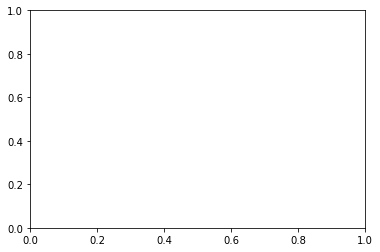

In [56]:
fig , ax1 = plt.subplots()
plt.plot(balance_cash_vs_neg_cash_tech, lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')

In [37]:
balance_intan_vs_tan_tech[['Long Term Investments & Receivables','Property, Plant & Equipment, Net','Retained Earnings']].hvplot.hist(  y=['Long Term Investments & Receivables','Property, Plant & Equipment, Net','Retained Earnings'])

:NdOverlay   [Element]
   :Histogram   [Retained Earnings]   (Retained Earnings_count)

In [59]:
ax = plt.figure()
ax.canvas.set_window_title('Standard Deviations')
avg_return = mean(big_tech['Return'])
std_dev = sqrt(big_tech_([val * val for val in df['Return']]) - avg_return * avg_return)
std_devs_returns = [(val - avg_return) / std_dev for val in df['Return']]
df = pd.DataFrame({'StdDev' : std_devs_returns})
bins = []
max_bin = max(df['StdDev'])
curr_bin = min(df['StdDev']) 
while curr_bin < max_bin:
    bins.append(curr_bin)
    curr_bin += 1
ax.xlabel('Standard Dev')
ax.ylabel('Frequency')
ax.hist(df['StdDev'], bins)

ax = plt.figure()
ax.canvas.set_window_title('Market Capitalization')
ax.xlabel('Date')
ax.ylabel('Market Cap')
ax.plot(df['Date'], df['Market Cap'])
# Use scatter:
ax.scatter(df['Date'], df['Market Cap'])


NameError: name 'mean' is not defined

<Figure size 432x288 with 0 Axes>

In [38]:
balance_intan_vs_tan_dog[['Long Term Investments & Receivables','Property, Plant & Equipment, Net','Retained Earnings']].hvplot.hist(y=['Retained Earnings'])

:NdOverlay   [Element]
   :Histogram   [Retained Earnings]   (Retained Earnings_count)

In [39]:
bal_int_tan_vs_eqcash = merge_df(balance_sheet_intanglibles, balance_sheet_cash_equal).drop(columns=['Treasury Stock_y'])
bal_int_tan_vs_eqcash

Treasury Stock_x  Long Term Investments & Receivables  \
Ticker Fiscal Year                                                          
A      2016              -2147483648                            135000000   
ABBV   2014               -972000000                             92000000   
       2015              -2147483648                            145000000   
       2016              -2147483648                           1783000000   
       2017              -2147483648                           2090000000   
...                              ...                                  ...   
XOM    2017              -2147483648                          -2147483648   
       2018              -2147483648                          -2147483648   
       2019              -2147483648                          -2147483648   
XRX    2014               -105000000                           1338000000   
       2018                -55000000                           1403000000   

                    Shares (Basic)  Shares (Diluted)  Total Current Assets  \
Ticker Fiscal Year                                                           
A      2016              326000000         329000000           -2147483648   
ABBV   2014             1595000000        1610000000           -2147483648   
       2015             1625000000        1637000000           -2147483648   
       2016             1622000000        1631000000           -2147483648   
       2017             1596000000        1603000000           -2147483648   
...                            ...               ...                   ...   
XOM    2017            -2147483648       -2147483648           -2147483648   
       2018            -2147483648       -2147483648           -2147483648   
       2019            -2147483648       -2147483648           -2147483648   
XRX    2014              288591250         292899250           -2147483648   
       2018              248707000         251660000           -2147483648   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
A      2016                                             -2147483648   
ABBV   2014                                             -2147483648   
       2015                                             -2147483648   
       2016                                             -2147483648   
       2017                                             -2147483648   
...                                                             ...   
XOM    2017                                             -2147483648   
       2018                                             -2147483648   
       2019                                             -2147483648   
XRX    2014                                              1411000000   
       2018                                              1084000000   

                    Accounts & Notes Receivable  Retained Earnings  
Ticker Fiscal Year                                                  
A      2016                           631000000        -2147483648  
ABBV   2014                         -2147483648          535000000  
       2015                         -2147483648        -2147483648  
       2016                         -2147483648        -2147483648  
       2017                         -2147483648        -2147483648  
...                                         ...                ...  
XOM    2017                         -2147483648        -2147483648  
       2018                         -2147483648        -2147483648  
       2019                         -2147483648        -2147483648  
XRX    2014                         -2147483648        -2147483648  
       2018                          1276000000        -2147483648  

[657 rows x 8 columns]

In [40]:
bal_int_tan_vs_eqcash_new = bal_int_tan_vs_eqcash.loc[['X','XOM']]
bal_int_tan_vs_eqcash_new

Treasury Stock_x  Long Term Investments & Receivables  \
Ticker Fiscal Year                                                          
X      2014               -396000000                            577000000   
       2015               -339000000                            540000000   
       2016               -182000000                            528000000   
       2017                -76000000                            480000000   
       2018                -78000000                            513000000   
       2019               -173000000                           1466000000   
XOM    2014              -2147483648                          -2147483648   
       2015              -2147483648                          -2147483648   
       2016              -2147483648                          -2147483648   
       2017              -2147483648                          -2147483648   
       2018              -2147483648                          -2147483648   
       2019              -2147483648                          -2147483648   

                    Shares (Basic)  Shares (Diluted)  Total Current Assets  \
Ticker Fiscal Year                                                           
X      2014              152103000         152103000           -2147483648   
       2015              146094000         146094000           -2147483648   
       2016              156673000         156673000           -2147483648   
       2017              176520000         176520000           -2147483648   
       2018              178461000         178461000           -2147483648   
       2019              171418000         171418000           -2147483648   
XOM    2014            -2147483648       -2147483648           -2147483648   
       2015            -2147483648       -2147483648           -2147483648   
       2016            -2147483648       -2147483648           -2147483648   
       2017            -2147483648       -2147483648           -2147483648   
       2018            -2147483648       -2147483648           -2147483648   
       2019            -2147483648       -2147483648           -2147483648   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
X      2014                                              1354000000   
       2015                                               755000000   
       2016                                              1515000000   
       2017                                              1553000000   
       2018                                              1000000000   
       2019                                               749000000   
XOM    2014                                             -2147483648   
       2015                                             -2147483648   
       2016                                             -2147483648   
       2017                                             -2147483648   
       2018                                             -2147483648   
       2019                                             -2147483648   

                    Accounts & Notes Receivable  Retained Earnings  
Ticker Fiscal Year                                                  
X      2014                          1632000000         1862000000  
       2015                           864000000          190000000  
       2016                           976000000         -250000000  
       2017                          1173000000          133000000  
       2018                          1435000000         1212000000  
       2019                           956000000          544000000  
XOM    2014                         -2147483648        -2147483648  
       2015                         -2147483648        -2147483648  
       2016                         -2147483648        -2147483648  
       2017                         -2147483648        -2147483648  
       2018              

In [41]:
bal_int_tan_vs_eqcash_tech = bal_int_tan_vs_eqcash.loc[['AME','IBM']]
bal_int_tan_vs_eqcash_tech

Treasury Stock_x  Long Term Investments & Receivables  \
Ticker Fiscal Year                                                          
AME    2014               -457807000                            154322000   
       2015               -885430000                            177481000   
       2016              -1211539000                            146283000   
       2017              -1209135000                            239129000   
       2018              -1570184000                            256210000   
       2019              -1574464000                            279790000   
IBM    2014              -2147483648                          -2147483648   
       2015              -2147483648                          -2147483648   
       2016              -2147483648                          -2147483648   
       2017              -2147483648                          -2147483648   
       2018              -2147483648                          -2147483648   
       2019              -2147483648                           2074000000   

                    Shares (Basic)  Shares (Diluted)  Total Current Assets  \
Ticker Fiscal Year                                                           
AME    2014              244885000         247102000            1578604000   
       2015              239906000         241586000            1618827000   
       2016              232593000         233730000            1928190000   
       2017              230229000         231845000            1934655000   
       2018              230823000         232712000            1836144000   
       2019              227759000         229395000            2025771000   
IBM    2014             1004272584        1010000480           -2147483648   
       2015              978744523         982700267           -2147483648   
       2016              955422530         958714097           -2147483648   
       2017              932828295         937385625           -2147483648   
       2018              912048072         916315714           -2147483648   
       2019              887235105         892813376           -2147483648   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
AME    2014                                               377615000   
       2015                                               381005000   
       2016                                               717259000   
       2017                                               646300000   
       2018                                               353975000   
       2019                                               393030000   
IBM    2014                                             -2147483648   
       2015                                             -2147483648   
       2016                                             -2147483648   
       2017                                             -2147483648   
       2018                                             -2147483648   
       2019                                             -2147483648   

                    Accounts & Notes Receivable  Retained Earnings  
Ticker Fiscal Year                                                  
AME    2014                           585462000        -2147483648  
       2015                           603295000        -2147483648  
       2016                           592326000        -2147483648  
       2017                           668176000        -2147483648  
       2018                           732839000        -2147483648  
       2019                           744760000        -2147483648  
IBM    2014                         -2147483648        -2147483648  
       2015                         -2147483648        -2147483648  
       2016                         -2147483648        -2147483648  
       2017                         -2147483648        -2147483648  
       2018              

In [42]:
bal_tan_vs_neg_cash = merge_df(balance_data_neg, balance_sheet_tanglibles)
bal_tan_vs_neg_cash

Inventories  Share Capital & Additional Paid-In Capital  \
Ticker Fiscal Year                                                            
A      2016           533000000                                 -2147483648   
ABBV   2014          1124000000                                 -2147483648   
       2015          1719000000                                 -2147483648   
       2016          1444000000                                 -2147483648   
       2017          1605000000                                 -2147483648   
...                         ...                                         ...   
XOM    2017         -2147483648                                 -2147483648   
       2018         -2147483648                                 -2147483648   
       2019         -2147483648                                 -2147483648   
XRX    2014           934000000                                 -2147483648   
       2018           818000000                                 -2147483648   

                    Payables & Accruals  Total Noncurrent Liabilities  \
Ticker Fiscal Year                                                      
A      2016                   257000000                   -2147483648   
ABBV   2014                 -2147483648                   -2147483648   
       2015                 -2147483648                   -2147483648   
       2016                 -2147483648                   -2147483648   
       2017                 -2147483648                   -2147483648   
...                                 ...                           ...   
XOM    2017                 -2147483648                   -2147483648   
       2018                 -2147483648                   -2147483648   
       2019                 -2147483648                   -2147483648   
XRX    2014                 -2147483648                   -2147483648   
       2018                  1440000000                   -2147483648   

                    Long Term Debt  Total Liabilities & Equity  \
Ticker Fiscal Year                                               
A      2016             1904000000                  -795934592   
ABBV   2014            -2147483648                  1743196224   
       2015            -2147483648                  1510392448   
       2016            -2147483648                  1674490560   
       2017            -2147483648                  2066523264   
...                            ...                         ...   
XOM    2017            -2147483648                   798649024   
       2018            -2147483648                 -1696350976   
       2019            -2147483648                  1819747136   
XRX    2014            -2147483648                  1888196224   
       2018            -2147483648                  1989098112   

                    Total Current Liabilities  Total Current Assets  \
Ticker Fiscal Year                                                    
A      2016                         945000000           -2147483648   
ABBV   2014                       -2147483648           -2147483648   
       2015                       -2147483648           -2147483648   
       2016                       -2147483648           -2147483648   
       2017                       -2147483648           -2147483648   
...                                       ...                   ...   
XOM    2017                       -2147483648           -2147483648   
       2018                       -2147483648           -2147483648   
       2019                       -2147483648           -2147483648   
XRX    2014                       -2147483648           -2147483648   
       2018                       -2147483648           -2147483648   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Fiscal Year                                                    
A      2016                                             -2147483648   
ABBV   2014                                   

In [43]:
bal_tan_vs_neg_cash_tech = bal_tan_vs_neg_cash.loc[['AME','IBM']]
bal_tan_vs_neg_cash_tech

Inventories  Share Capital & Additional Paid-In Capital  \
Ticker Fiscal Year                                                            
AME    2014           495896000                                   494339000   
       2015           514451000                                   570894000   
       2016           492104000                                   606758000   
       2017           540504000                                   663525000   
       2018           624744000                                   709383000   
       2019           624567000                                   835483000   
IBM    2014          2103000000                                 -2147483648   
       2015          1551000000                                 -2147483648   
       2016          1553000000                                 -2147483648   
       2017          1583000000                                 -2147483648   
       2018          1682000000                                 -2147483648   
       2019          1619000000                                 -2147483648   

                    Payables & Accruals  Total Noncurrent Liabilities  \
Ticker Fiscal Year                                                      
AME    2014                   649943000                   -2147483648   
       2015                   639097000                   -2147483648   
       2016                   645520000                   -2147483648   
       2017                   830540000                   -2147483648   
       2018                   762599000                   -2147483648   
       2019                   771591000                   -2147483648   
IBM    2014                 -2147483648                   -2147483648   
       2015                 -2147483648                   -2147483648   
       2016                 -2147483648                   -2147483648   
       2017                 -2147483648                   -2147483648   
       2018                 -2147483648                   -2147483648   
       2019                 -2147483648                   -2147483648   

                    Long Term Debt  Total Liabilities & Equity  \
Ticker Fiscal Year                                               
AME    2014             1427825000                  2125995704   
       2015             1553116000                 -1929484592   
       2016             2062644000                 -1489260592   
       2017             1866166000                  -793870592   
       2018            -2147483648                    72353408   
       2019            -2147483648                  1254624408   
IBM    2014            -2147483648                  1307883008   
       2015            -2147483648                 -1174149696   
       2016            -2147483648                  1503883008   
       2017            -2147483648                   800948416   
       2018            -2147483648                 -1171051584   
       2019            -2147483648                  1860144640   

                    Total Current Liabilities  Total Current Assets  \
Ticker Fiscal Year                                                    
AME    2014                         936144000            1578604000   
       2015                        1024021000            1618827000   
       2016                         924441000            1928190000   
       2017                        1138663000            1934655000   
       2018                        1258704000            1836144000   
       2019                        1425858000            2025771000   
IBM    2014                       -2147483648           -2147483648   
       2015                       -2147483648           -2147483648   
       2016                       -2147483648           -2147483648   
       2017                       -2147483648           -2147483648   
       2018                       -2147483648           -2147483648   
       2019                       -2147483

In [44]:
return_on_cap(bal_tan_vs_neg_cash_tech).hvplot.bar()

:Bars   [Ticker,Fiscal Year]   (ROC)

In [45]:
bal_tan_vs_neg_cash_new = bal_tan_vs_neg_cash.loc[['X','XOM']]

bal_tan_vs_neg_cash_new

Inventories  Share Capital & Additional Paid-In Capital  \
Ticker Fiscal Year                                                            
X      2014         -2147483648                                 -2147483648   
       2015          2074000000                                 -2147483648   
       2016          1573000000                                 -2147483648   
       2017          1738000000                                 -2147483648   
       2018          2092000000                                 -2147483648   
       2019          1785000000                                 -2147483648   
XOM    2014         -2147483648                                 -2147483648   
       2015         -2147483648                                 -2147483648   
       2016         -2147483648                                 -2147483648   
       2017         -2147483648                                 -2147483648   
       2018         -2147483648                                 -2147483648   
       2019         -2147483648                                 -2147483648   

                    Payables & Accruals  Total Noncurrent Liabilities  \
Ticker Fiscal Year                                                      
X      2014                 -2147483648                   -2147483648   
       2015                  1923000000                   -2147483648   
       2016                  2087000000                   -2147483648   
       2017                 -2147483648                   -2147483648   
       2018                 -2147483648                   -2147483648   
       2019                 -2147483648                   -2147483648   
XOM    2014                 -2147483648                   -2147483648   
       2015                 -2147483648                   -2147483648   
       2016                 -2147483648                   -2147483648   
       2017                 -2147483648                   -2147483648   
       2018                 -2147483648                   -2147483648   
       2019                 -2147483648                   -2147483648   

                    Long Term Debt  Total Liabilities & Equity  \
Ticker Fiscal Year                                               
X      2014            -2147483648                  -871901888   
       2015            -2147483648                   577065408   
       2016            -2147483648                   570065408   
       2017            -2147483648                  1272065408   
       2018            -2147483648                 -1902901888   
       2019            -2147483648                 -1276901888   
XOM    2014            -2147483648                  1600649024   
       2015            -2147483648                  1750550912   
       2016            -2147483648                  -398481792   
       2017            -2147483648                   798649024   
       2018            -2147483648                 -1696350976   
       2019            -2147483648                  1819747136   

                    Total Current Liabilities  Total Current Assets  \
Ticker Fiscal Year                                                    
X      2014                       -2147483648           -2147483648   
       2015                       -2147483648           -2147483648   
       2016                       -2147483648           -2147483648   
       2017                       -2147483648           -2147483648   
       2018                       -2147483648           -2147483648   
       2019                       -2147483648           -2147483648   
XOM    2014                       -2147483648           -2147483648   
       2015                       -2147483648           -2147483648   
       2016                       -2147483648           -2147483648   
       2017                       -2147483648           -2147483648   
       2018                       -2147483648           -2147483648   
       2019                       -2147483

In [46]:

bal_assests = merge_df(balance_data,balance_sheet_tanglibles)
bal_assests


Shares (Basic)  Shares (Diluted)  \
Ticker Fiscal Year                                     
A      2016              326000000         329000000   
ABBV   2014             1595000000        1610000000   
       2015             1625000000        1637000000   
       2016             1622000000        1631000000   
       2017             1596000000        1603000000   
...                            ...               ...   
XOM    2017            -2147483648       -2147483648   
       2018            -2147483648       -2147483648   
       2019            -2147483648       -2147483648   
XRX    2014              288591250         292899250   
       2018              248707000         251660000   

                    Cash, Cash Equivalents & Short Term Investments_x  \
Ticker Fiscal Year                                                      
A      2016                                               -2147483648   
ABBV   2014                                               -2147483648   
       2015                                               -2147483648   
       2016                                               -2147483648   
       2017                                               -2147483648   
...                                                               ...   
XOM    2017                                               -2147483648   
       2018                                               -2147483648   
       2019                                               -2147483648   
XRX    2014                                                1411000000   
       2018                                                1084000000   

                    Accounts & Notes Receivable  Inventories  \
Ticker Fiscal Year                                             
A      2016                           631000000    533000000   
ABBV   2014                         -2147483648   1124000000   
       2015                         -2147483648   1719000000   
       2016                         -2147483648   1444000000   
       2017                         -2147483648   1605000000   
...                                         ...          ...   
XOM    2017                         -2147483648  -2147483648   
       2018                         -2147483648  -2147483648   
       2019                         -2147483648  -2147483648   
XRX    2014                         -2147483648    934000000   
       2018                          1276000000    818000000   

                    Total Current Assets_x  \
Ticker Fiscal Year                           
A      2016                    -2147483648   
ABBV   2014                    -2147483648   
       2015                    -2147483648   
       2016                    -2147483648   
       2017                    -2147483648   
...                                    ...   
XOM    2017                    -2147483648   
       2018                    -2147483648   
       2019                    -2147483648   
XRX    2014                    -2147483648   
       2018                    -2147483648   

                    Property, Plant & Equipment, Net_x  \
Ticker Fiscal Year                                       
A      2016                                  639000000   
ABBV   2014                                -2147483648   
       2015                                -2147483648   
       2016                                -2147483648   
       2017                                -2147483648   
...                                                ...   
XOM    2017                                -2147483648   
       2018                                -2147483648   
       2019                                -2147483648   
XRX    2014                                 1648000000   
       2018                                  941000000   

                    Long Term Investments & Receivables  \
Ticker Fiscal Year                                        
A      2016                         

In [47]:

bal_assests_new = bal_assests.loc[['X','XOM']]
bal_assests_new


Shares (Basic)  Shares (Diluted)  \
Ticker Fiscal Year                                     
X      2014              152103000         152103000   
       2015              146094000         146094000   
       2016              156673000         156673000   
       2017              176520000         176520000   
       2018              178461000         178461000   
       2019              171418000         171418000   
XOM    2014            -2147483648       -2147483648   
       2015            -2147483648       -2147483648   
       2016            -2147483648       -2147483648   
       2017            -2147483648       -2147483648   
       2018            -2147483648       -2147483648   
       2019            -2147483648       -2147483648   

                    Cash, Cash Equivalents & Short Term Investments_x  \
Ticker Fiscal Year                                                      
X      2014                                                1354000000   
       2015                                                 755000000   
       2016                                                1515000000   
       2017                                                1553000000   
       2018                                                1000000000   
       2019                                                 749000000   
XOM    2014                                               -2147483648   
       2015                                               -2147483648   
       2016                                               -2147483648   
       2017                                               -2147483648   
       2018                                               -2147483648   
       2019                                               -2147483648   

                    Accounts & Notes Receivable  Inventories  \
Ticker Fiscal Year                                             
X      2014                          1632000000  -2147483648   
       2015                           864000000   2074000000   
       2016                           976000000   1573000000   
       2017                          1173000000   1738000000   
       2018                          1435000000   2092000000   
       2019                           956000000   1785000000   
XOM    2014                         -2147483648  -2147483648   
       2015                         -2147483648  -2147483648   
       2016                         -2147483648  -2147483648   
       2017                         -2147483648  -2147483648   
       2018                         -2147483648  -2147483648   
       2019                         -2147483648  -2147483648   

                    Total Current Assets_x  \
Ticker Fiscal Year                           
X      2014                    -2147483648   
       2015                    -2147483648   
       2016                    -2147483648   
       2017                    -2147483648   
       2018                    -2147483648   
       2019                    -2147483648   
XOM    2014                    -2147483648   
       2015                    -2147483648   
       2016                    -2147483648   
       2017                    -2147483648   
       2018                    -2147483648   
       2019                    -2147483648   

                    Property, Plant & Equipment, Net_x  \
Ticker Fiscal Year                                       
X      2014                                -2147483648   
       2015                                -2147483648   
       2016                                -2147483648   
       2017                                -2147483648   
       2018                                -2147483648   
       2019                                -2147483648   
XOM    2014                                -2147483648   
       2015                                -2147483648   
       2016                                -2147483648   
       2017                     

<AxesSubplot:xlabel='Ticker,Fiscal Year'>

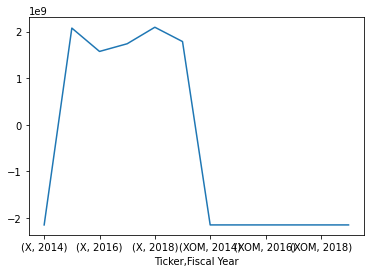

In [48]:

bal_assests_new['Inventories'].plot.line()


In [49]:

bal_tech = bal_assests.loc[['AME','IBM']]
bal_tech["Total Assets"].hvplot.bar()


:Bars   [Ticker,Fiscal Year]   (Total Assets)